# Chapter 3: Exponential Smoothing Based Methods

## Chapter 3: Introduction to Time Series Smoothing and Decomposition

In [7]:
# Load modules
import requests
import statsmodels.api as sm
import io
import pandas as pd

In [8]:
# Load Dataset
DATA_URL="http://robjhyndman.com/tsdldata/data/nybirths.dat"
fopen = requests.get(DATA_URL).content
ds=pd.read_csv(io.StringIO(fopen.decode('utf-8')),  header=None, names=['birthcount'])
print(ds.head())

   birthcount
0      26.663
1      23.598
2      26.931
3      24.740
4      25.806


In [9]:
# Add time index
date=pd.date_range("1946-01-01", "1959-12-31", freq="1M")
ds['Date']=pd.DataFrame(date)
ds = ds.set_index('Date')

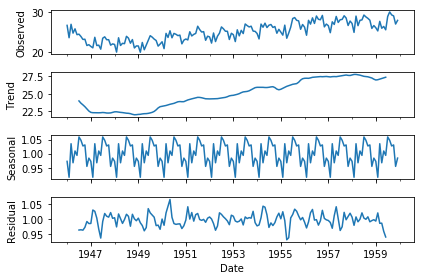

In [11]:
# decompose dataset
res = sm.tsa.seasonal_decompose(ds.birthcount, model="multiplicative")
resplot = res.plot()

## Chapter 3: First Order Exponential Smoothing

In [13]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [16]:
# Load Dataset
ibm_df = pd.read_csv('ibm-common-stock-closing-prices.csv')
ibm_df.head()

#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)
ibm_df.head()

# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

ibm_df['SES'] = single_exp_smoothing(ibm_df['Close_Price'], 0.8)

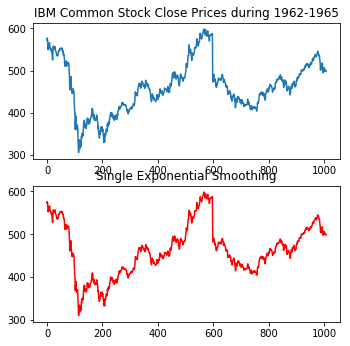

In [18]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax)
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['SES'].plot(ax=ax, color='r')
ax.set_title('Single Exponential Smoothing')
plt.savefig('B07887_02_14.png', format='png', dpi=300)

In [26]:
# Plot the forecasted values using multiple alpha values
#Calculate the moving averages using 'rolling' and 'mean' functions
ibm_df['SES2']  = single_exp_smoothing(ibm_df['Close_Price'], 0.2);
ibm_df['SES6']= single_exp_smoothing(ibm_df['Close_Price'], 0.6);
ibm_df['SES8']= single_exp_smoothing(ibm_df['Close_Price'], 0.8);

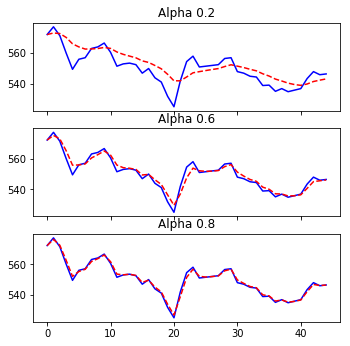

In [30]:
# Plot the curves
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.2')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
ibm_df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 0.8')
plt.savefig('B07887_02_15.png', format='png', dpi=300)

## Chapter 3: Second Order Exponential Smoothing

In [31]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [33]:
#Read dataset into a pandas.DataFrame
beer_df = pd.read_csv('quarterly-beer-production-in-aus-March 1956-June 1994.csv')

In [35]:
#Display shape of the dataset
print('Shape of the dataframe:', beer_df.shape)
beer_df.head()

#Rename the 2nd column
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':
                        'Beer_Prod'
                       },
               inplace=True
              )

Shape of the dataframe: (155, 2)


In [37]:
#Remove missing values
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 0
Shape after removing missing values: (154, 2)


In [39]:
# Function for double exponential smoothing
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

In [40]:
beer_df['DEF'] = double_exp_smoothing(beer_df['Beer_Prod'], 0.4, 0.7)

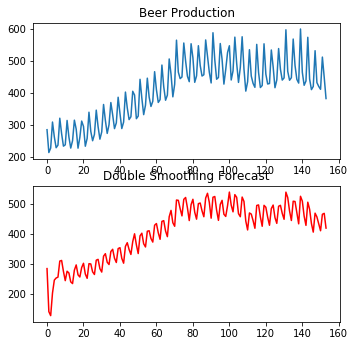

In [42]:
### Plot double Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
beer_df['Beer_Prod'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')
plt.savefig('B07887_03_14.png', format='png', dpi=300)

In [43]:
# Single vs Double Forecast value
beer_df['Single_Exponential_Forecast'] = single_exp_smoothing(beer_df['Beer_Prod'], 0.4)


Text(0.5, 1.0, 'Actual Vs Single Smoothing Forecasting')

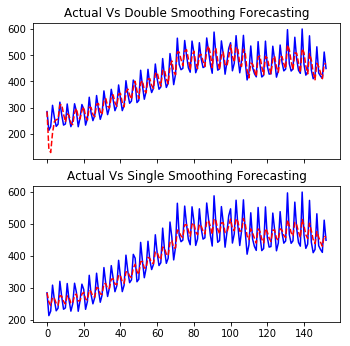

In [46]:
# Plot Single Exponential Smoothing forecasted value
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[0])
beer_df['DEF'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Actual Vs Double Smoothing Forecasting')

beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[1])
beer_df['Single_Exponential_Forecast'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Actual Vs Single Smoothing Forecasting')

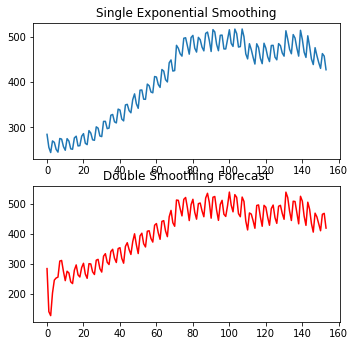

In [49]:
# Plot single and double exponential smoothing
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
beer_df['Single_Exponential_Forecast'].plot(ax=ax)
ax.set_title('Single Exponential Smoothing')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')
plt.savefig('B07887_03_14.png', format='png', dpi=300)

## Chapter 3: Higher Order Exponential Smoothing

In [50]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [52]:
#read the data from into a pandas.DataFrame
wisc_emp = pd.read_csv('wisconsin-employment-time-series.csv')

#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', wisc_emp.shape)

Shape of the DataFrame: (178, 2)


In [53]:
#Let's see first 10 rows of it
wisc_emp.head()

,Month,Employment
0,1961-01,239.6
1,1961-02,236.4
2,1961-03,236.8
3,1961-04,241.5
4,1961-05,243.7


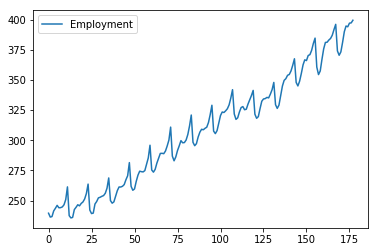

In [54]:
# plot the wisconsin employment dataset
wisc_emp.plot()

In [55]:
# Capture seasonality component
def initialize_T(x, seasonLength):
    total=0.0
    for i in range(seasonLength):
        total+=float(x[i+seasonLength]-x[i])/seasonLength
    return total

initialize_T(wisc_emp['Employment'], 12)

1.6916666666666653

In [56]:
# Initialize seasonal trend
def initialize_seasonalilty(x, seasonLength):
    seasons={}
    seasonsMean=[]
    num_season=int(len(x)/seasonLength)
    # Compute season average
    for i in range(num_season):
        seasonsMean.append(sum(x[seasonLength*i:seasonLength*i+seasonLength])/float(seasonLength))
    
    # compute season intial values
    for i in range(seasonLength):
        tot=0.0
        for j in range(num_season):
            tot+=x[seasonLength*j+i]-seasonsMean[j]
        seasons[i]=tot/num_season
    return seasons
            
initialize_seasonalilty(wisc_emp['Employment'], 12)   

{0: -11.325000000000015,
 1: -14.48214285714287,
 2: -12.667857142857159,
 3: -6.403571428571445,
 4: -1.603571428571444,
 5: 1.5535714285714164,
 6: 1.0821428571428413,
 7: 2.22499999999998,
 8: 3.539285714285705,
 9: 6.89642857142856,
 10: 11.774999999999986,
 11: 19.410714285714267}

In [59]:
# Triple Exponential Smoothing Forecast
def triple_exp_smoothing(x, seasonLength, alpha, beta, gamma, h):
    yhat=[]
    S = initialize_seasonalilty(x, seasonLength)
    for i in range(len(x)+h):
        if i == 0:
            F = x[0]
            T = initialize_T(x, seasonLength)
            yhat.append(x[0])
            continue
        if i >= len(x):
            m = i - len(x) + 1
            yhat.append((F + m*T) + S[i%seasonLength])
        else:
            obsval = x[i]
            F_last, F= F, alpha*(obsval-S[i%seasonLength]) + (1-alpha)*(F+T)
            T = beta * (F-F_last) + (1-beta)*T
            S[i%seasonLength] = gamma*(obsval-F) + (1-gamma)*S[i%seasonLength]
            yhat.append(F+T+S[i%seasonLength])
    return yhat
# Triple exponential smoothing
wisc_emp['TES']=triple_exp_smoothing(wisc_emp['Employment'], 12, 0.4, 0.6, 0.2, 0)

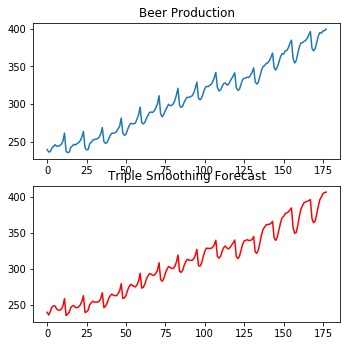

In [60]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
wisc_emp['Employment'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2,1,2)
wisc_emp['TES'].plot(ax=ax, color='r')
ax.set_title('Triple Smoothing Forecast')
plt.savefig('B07887_03_14.png', format='png', dpi=300)